In [61]:
# https://www.kaggle.com/alexeyb/coursera-winning-kaggle-competitions
import pandas as pd
import numpy as np
%matplotlib inline

In [62]:
train_sales=pd.read_csv('train_sales_joined_with_shops_and_items.csv')

In [63]:
train_sales_transformed = train_sales.pivot_table(index=['shop_id','item_id'], columns='date_block_num', values='item_cnt_day',aggfunc='sum',fill_value=0.0)
train_sales_transformed=train_sales_transformed.reset_index()
print(train_sales_transformed.shape)
train_sales_transformed.head()

(424124, 36)


date_block_num,shop_id,item_id,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,33
0,0,30,0,31,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,31,0,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,32,6,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,33,3,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,35,1,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
item_categories=pd.read_csv('item_categories_with_generated_features.csv')
items=pd.read_csv('data/items.csv')
item_categories.head()

,item_category_name,item_category_id,items_english,meta_category
0,PC - Гарнитуры/Наушники,0,PC - Garnitury/Nausniki,PC
1,Аксессуары - PS2,1,Aksessuary - PS2,Aksessuary
2,Аксессуары - PS3,2,Aksessuary - PS3,Aksessuary
3,Аксессуары - PS4,3,Aksessuary - PS4,Aksessuary
4,Аксессуары - PSP,4,Aksessuary - PSP,Aksessuary


In [65]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(item_categories.meta_category)
item_categories['meta_category_label']=le.transform(item_categories.meta_category)
item_categories=item_categories[['item_category_id','meta_category_label']]
item_categories.head()

,item_category_id,meta_category_label
0,0,16
1,1,0
2,2,0
3,3,0
4,4,0


In [66]:
train_with_item_cat=train_sales_transformed.merge(items,how='left')
train_with_item_cat=train_with_item_cat.merge(item_categories,how='left')
train_with_item_cat.shape

(424124, 39)

# add shops information

In [67]:
shops=pd.read_csv('shops_with_generated_features.csv')
shops.head()

,shop_name,shop_id,shops_english,town,region
0,"!Якутск Орджоникидзе, 56 фран",0,"!Akutsk Ordjonikidze, 56 fran",!Akutsk,Sakha
1,"!Якутск ТЦ ""Центральный"" фран",1,"!Akutsk TZ ""Zentral_nyj"" fran",!Akutsk,Sakha
2,"Адыгея ТЦ ""Мега""",2,"Adygea TZ ""Mega""",Adygea,Adygea
3,"Балашиха ТРК ""Октябрь-Киномир""",3,"Balasiha TRK ""Oktabr_-Kinomir""",Balasiha,Moscow
4,"Волжский ТЦ ""Волга Молл""",4,"Voljskij TZ ""Volga Moll""",Voljskij,Volgograd


In [68]:
shops['town_label']=shops["town"].astype('category').cat.codes
shops['region_label']=shops["region"].astype('category').cat.codes
shops=shops[['shop_id','town_label','region_label']]
shops.head()

,shop_id,town_label,region_label
0,0,0,8
1,1,0,8
2,2,1,0
3,3,4,6
4,4,27,11


In [69]:
train_with_item_cat_and_shops_region=train_with_item_cat.merge(shops,how='left')
train_with_item_cat_and_shops_region.head()

,shop_id,item_id,0,1,2,3,4,5,6,7,...,29,30,31,32,33,item_name,item_category_id,meta_category_label,town_label,region_label
0,0,30,0,31,0,0,0,0,0,0,...,0,0,0,0,0,007: КООРДИНАТЫ «СКАЙФОЛЛ»,40,13,0,8
1,0,31,0,11,0,0,0,0,0,0,...,0,0,0,0,0,007: КООРДИНАТЫ «СКАЙФОЛЛ» (BD),37,13,0,8
2,0,32,6,10,0,0,0,0,0,0,...,0,0,0,0,0,1+1,40,13,0,8
3,0,33,3,3,0,0,0,0,0,0,...,0,0,0,0,0,1+1 (BD),37,13,0,8
4,0,35,1,14,0,0,0,0,0,0,...,0,0,0,0,0,10 ЛЕТ СПУСТЯ,40,13,0,8


In [132]:
final_train=train_with_item_cat_and_shops_region.drop(columns=['item_name','item_category_id'])
final_train.head()

,shop_id,item_id,0,1,2,3,4,5,6,7,...,27,28,29,30,31,32,33,meta_category_label,town_label,region_label
0,0,30,0,31,0,0,0,0,0,0,...,0,0,0,0,0,0,0,13,0,8
1,0,31,0,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,13,0,8
2,0,32,6,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,13,0,8
3,0,33,3,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,13,0,8
4,0,35,1,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,13,0,8


# generate descriptive statistics features:

In [133]:
final_train['sales_avg']=final_train[[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]].mean(axis=1)
final_train['sales_min']=final_train[[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]].min(axis=1)
final_train['sales_max']=final_train[[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]].max(axis=1)
final_train['sales_std']=final_train[[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]].std(axis=1)
final_train['sales_median']=final_train[[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]].median(axis=1)
final_train.tail()

,shop_id,item_id,0,1,2,3,4,5,6,7,...,32,33,meta_category_label,town_label,region_label,sales_avg,sales_min,sales_max,sales_std,sales_median
424119,59,22154,1,0,0,0,0,0,0,0,...,0,0,13,3,24,0.000000,0,0,0.000000,0.0
424120,59,22155,0,0,0,0,0,0,1,0,...,0,0,13,3,24,0.000000,0,0,0.000000,0.0
424121,59,22162,0,0,0,0,0,0,0,0,...,0,0,13,3,24,1.230769,0,9,2.586949,0.0
424122,59,22164,0,0,0,0,0,0,0,0,...,0,0,13,3,24,0.461538,0,2,0.776250,0.0
424123,59,22167,0,0,0,0,0,0,0,0,...,0,0,14,3,24,0.000000,0,0,0.000000,0.0


# clip target value between -1 and 40 before training

In [134]:
final_train[33]=final_train[33].clip(-1,40)

# modeling

In [135]:
%%time
import xgboost as xgb
param = {'max_depth':10, 
         'subsample':1,
         'min_child_weight':0.5,
         'eta':0.3, 
         'num_round':1000, 
         'seed':1,
         'silent':0,
         'eval_metric':'rmse'}

X=final_train.drop(columns=[33])
Y=final_train[33]
xgbtrain = xgb.DMatrix(X,Y)
bst = xgb.train(param, xgbtrain)
preds = bst.predict(xgb.DMatrix(X))
from sklearn.metrics import mean_squared_error 
rmse = np.sqrt(mean_squared_error(preds,Y))
print(rmse)

[13:37:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 682 extra nodes, 0 pruned nodes, max_depth=10
[13:37:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 740 extra nodes, 0 pruned nodes, max_depth=10
[13:37:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 766 extra nodes, 0 pruned nodes, max_depth=10
[13:37:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 748 extra nodes, 0 pruned nodes, max_depth=10
[13:37:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 662 extra nodes, 0 pruned nodes, max_depth=10
[13:37:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 682 extra nodes, 0 pruned nodes, max_depth=10
[13:37:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 924 extra nodes, 0 pruned nodes, max_depth=10
[13:37:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 646 extra nodes, 0 pruned nodes, max_depth=10


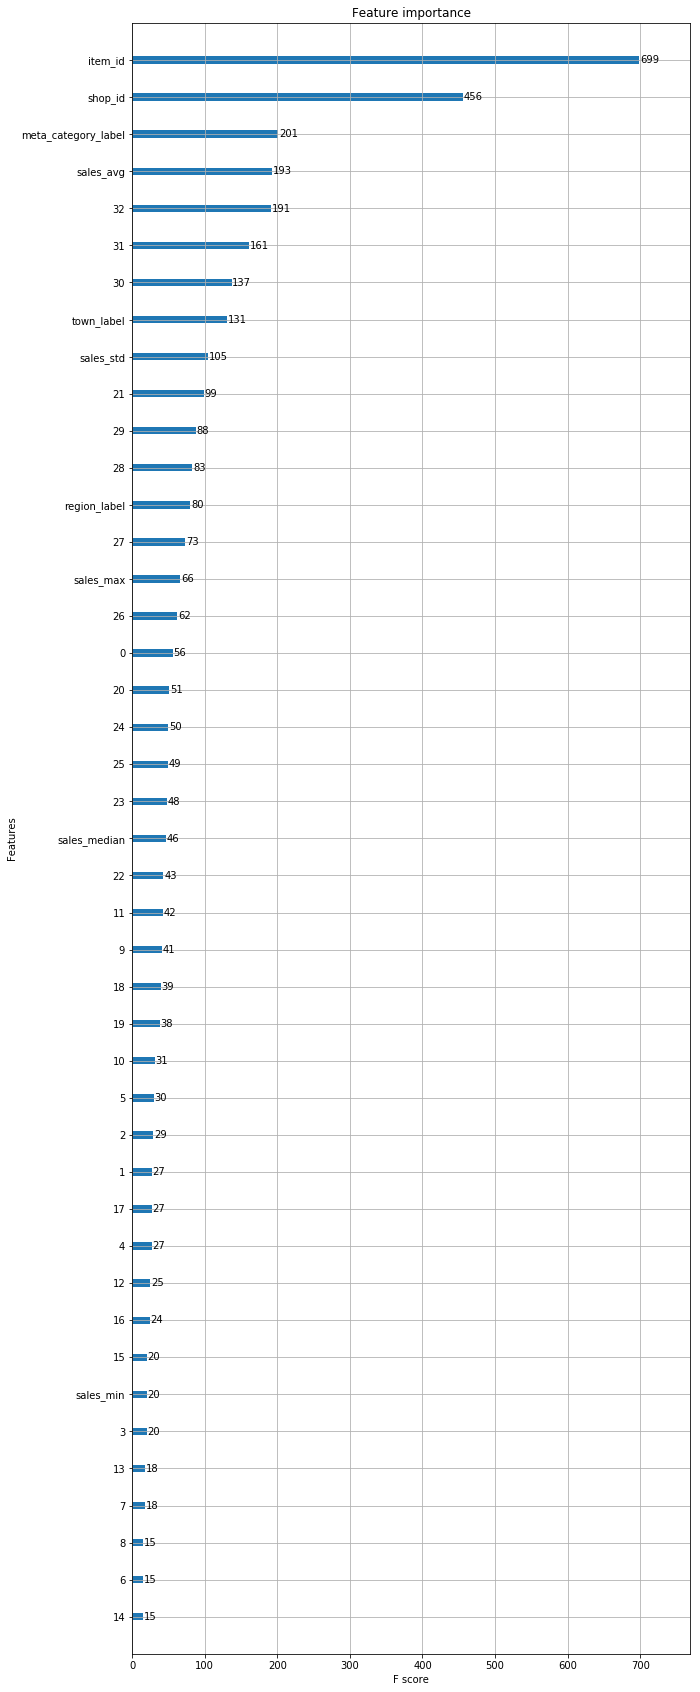

In [136]:
x_plt=xgb.plot_importance(bst)
x_plt.figure.set_size_inches(10, 30) 

In [137]:
test_sales=pd.read_csv('data/test.csv.gz')
test_sales=test_sales.merge(final_train,how='left',on = ["shop_id", "item_id"]).fillna(0.0)
test_sales.head()

,ID,shop_id,item_id,0,1,2,3,4,5,6,...,32,33,meta_category_label,town_label,region_label,sales_avg,sales_min,sales_max,sales_std,sales_median
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,7.0,28.0,12.0,1.000000,0.0,3.0,0.912871,1.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,7.0,28.0,12.0,0.692308,0.0,3.0,1.182132,0.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.0,28.0,12.0,0.076923,0.0,1.0,0.277350,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


In [138]:
X_test=test_sales.drop(columns=['ID',33])
preds = bst.predict(xgb.DMatrix(X_test))
predictions=preds.clip(0,20)

In [139]:
submission = pd.DataFrame({'ID':test_sales.ID,'item_cnt_month': predictions })
submission.head()

,ID,item_cnt_month
0,0,0.626204
1,1,0.221493
2,2,0.819936
3,3,0.141877
4,4,0.221493


In [140]:
submission.to_csv("xgboost_0_33_transformed_df_with_town_and_region_descriptive_stats_clip_target_0_40.csv",index=False)
# private score unknown
# public score 1.06967 